In [5]:
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline 

In [8]:
#crop test images and cache to TEST_CROP_DIR by detections_full.pkl and RFCN/ImageSets/Main/test.txt
FISH_CLASSES = ['NoF', 'ALB', 'BET', 'DOL', 'LAG', 'OTHER', 'SHARK', 'YFT']

import pickle 
with open('../data/RFNC_detections/detections_full.pkl','rb') as f:
    detections_full = pickle.load(f, encoding='latin1') 
    
CONF_THRESH = 0.5
outputs = []

for im in range(len(detections_full[0])):
#for im in range(1):
    outputs_im = []
    detects_im = []
    for cls in range(1,len(FISH_CLASSES)):
        detects_im_cls = detections_full[cls][im]
        for i in range(len(detects_im_cls)):
            if np.max(detects_im_cls[i,4+cls]) >= CONF_THRESH:
                outputs_im.append(detects_im_cls[i,:])   
    for cls in range(1,len(FISH_CLASSES)):  
        detects_im.append(detections_full[cls][im])
    detects_im = np.vstack(detects_im)
    if len(outputs_im) == 0:
        ind = np.argmax(np.max(detects_im[:,5:], axis=1))
        l = [0,0,0,0]
        l.extend(np.ndarray.tolist(detects_im[ind,4:]))
        outputs_im.append(l)
    outputs_im = np.asarray(outputs_im)
    outputs.append(outputs_im)

print(sum([outputs[i].shape[0] for i in range(len(outputs))]))

6211


[[  2.67535614e+02   1.28896454e+02   3.69333282e+02   3.94285736e+02
    5.73445251e-03   9.87597764e-01   1.09473278e-03   6.98532021e-05
    7.91193961e-05   1.34370977e-03   7.26853759e-05   4.00780421e-03]]
[[  3.95301483e+02   3.41683472e+02   6.11583679e+02   4.36634644e+02
    3.75351659e-03   1.02561316e-05   5.51887933e-05   2.34426145e-04
    1.93767864e-05   3.46613729e-06   9.56158096e-04   9.94967639e-01]]
[[  3.05648499e+02   3.54593048e+02   6.75567078e+02   5.31066772e+02
    4.66631405e-04   9.98834908e-01   2.45798059e-04   2.96669896e-05
    1.31677498e-05   1.02036967e-04   2.21561750e-05   2.85595830e-04]
 [  8.32470886e+02   4.89596222e+02   1.12723596e+03   6.02116577e+02
    1.57735334e-03   9.84483182e-01   1.58627029e-03   3.68954119e-04
    2.51264515e-04   1.04555702e-02   3.72245820e-04   9.05200664e-04]]
[[  2.26909531e+02   3.94406311e+02   3.53588470e+02   5.05084167e+02
    2.80202762e-03   9.96823430e-01   1.52630426e-04   1.64119319e-05
    5.9325107

/opt/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


[[  2.08990494e+02   3.76535950e+02   4.83617920e+02   5.33107666e+02
    4.36259247e-03   3.54163203e-05   4.38308925e-05   2.96299277e-05
    1.00783463e-05   3.48609831e-07   2.27494056e-05   9.95495319e-01]]
[[  7.42683594e+02   2.86716064e+02   8.27503052e+02   3.82135986e+02
    6.95893541e-03   7.53394306e-01   8.32328126e-02   7.40061328e-03
    1.56809017e-03   1.03833877e-01   4.98947175e-03   3.86218019e-02]]
[[  7.19957458e+02   2.78420410e+02   1.06723840e+03   4.32100708e+02
    4.35117254e-04   9.99007165e-01   4.21350444e-04   4.75198067e-06
    6.53997085e-06   6.63523970e-05   4.15498107e-06   5.44874711e-05]
 [  3.22388458e+02   9.75390930e+01   6.32467651e+02   1.93354523e+02
    2.24968675e-03   9.96379316e-01   6.22109859e-04   6.61182494e-05
    4.34856847e-05   3.90375673e-04   1.22147458e-05   2.36588472e-04]
 [  3.21230591e+02   1.76934326e+02   6.22420715e+02   3.05084137e+02
    3.90192051e-03   9.57603514e-01   2.71253455e-02   5.49376768e-04
    4.33418580

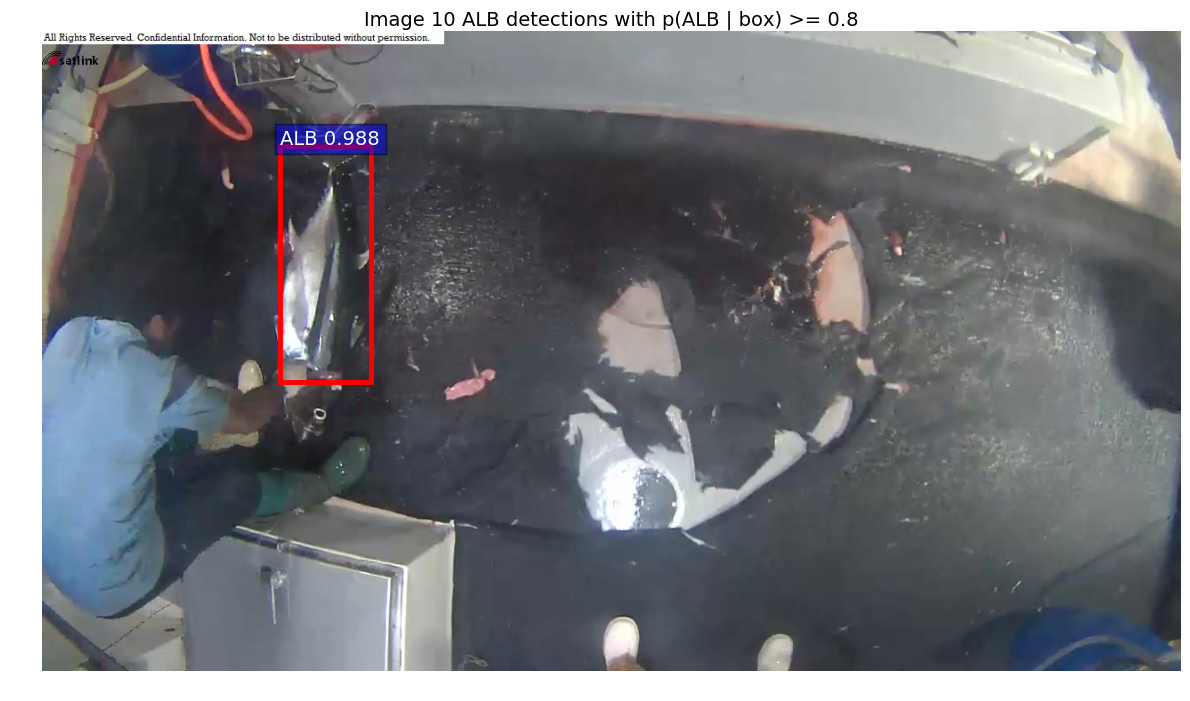

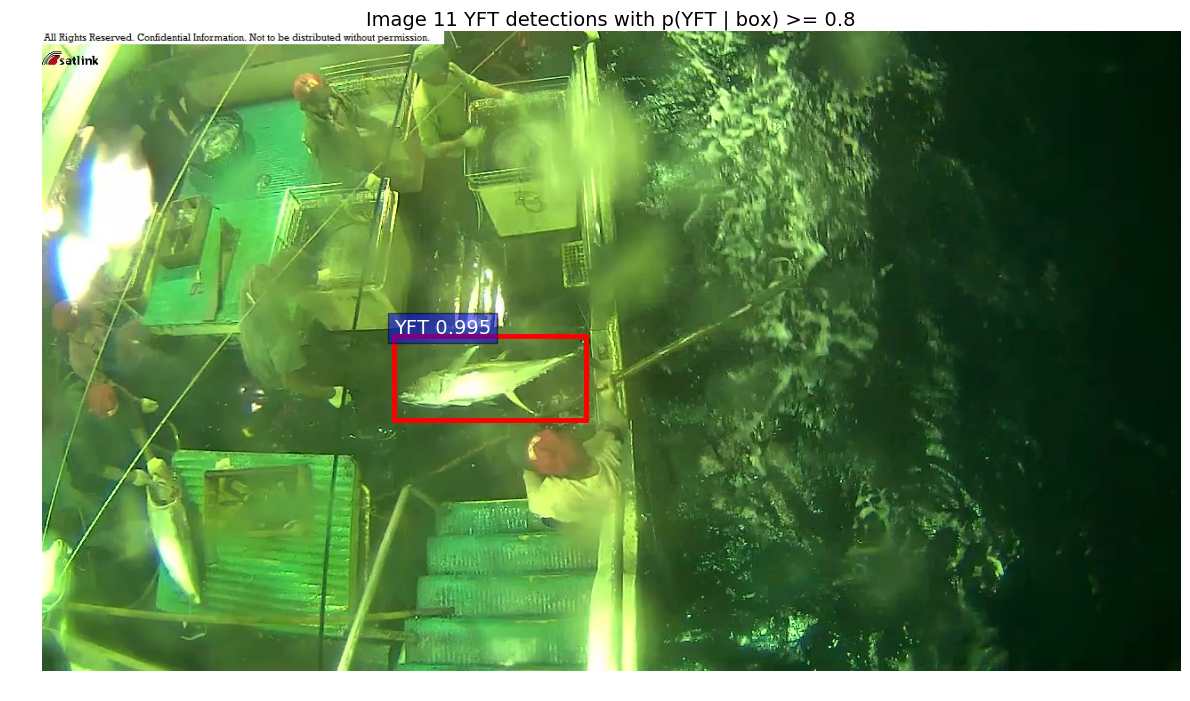

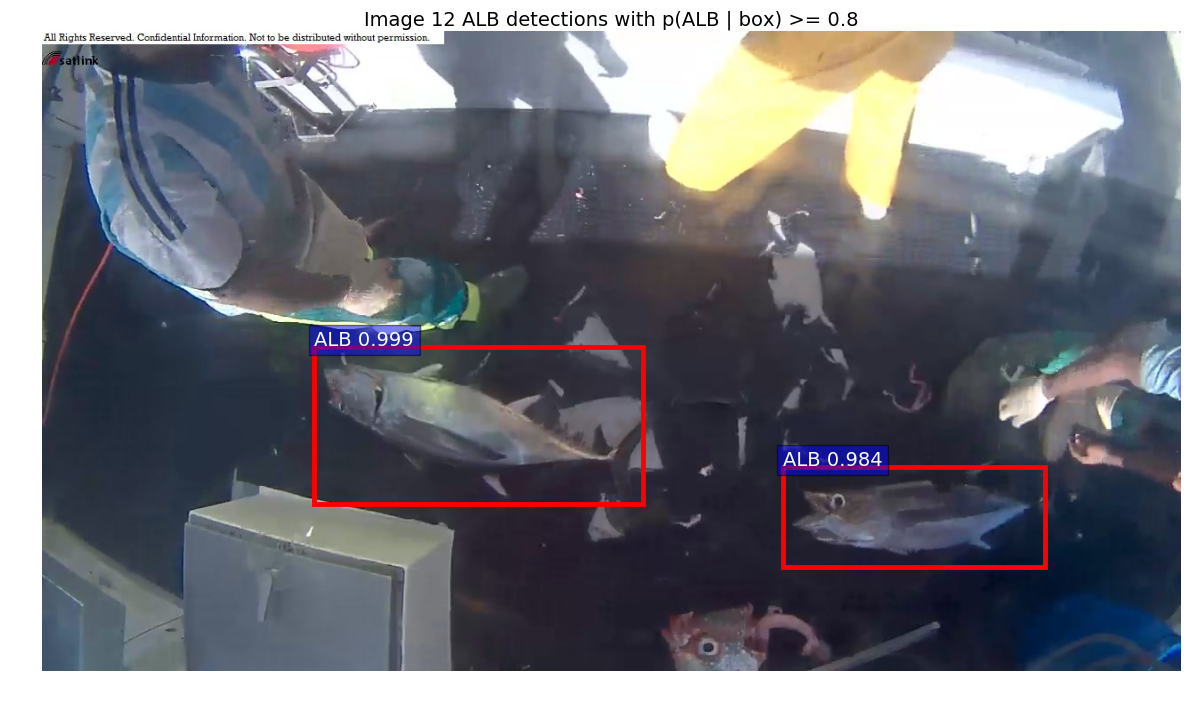

In [ ]:
#visualize test image crop
FISH_CLASSES = ['NoF', 'ALB', 'BET', 'DOL', 'LAG', 'OTHER', 'SHARK', 'YFT']

with open("../RFCN/ImageSets/Main/test.txt","r") as f:
    ims = f.readlines()
test_files = [im[:-1]+'.jpg' for im in ims]

for j in range(10,100):
    dets = outputs[j]
    print(dets)
    im = Image.open("../RFCN/JPEGImages/"+test_files[j])
    im = np.asarray(im)
    #im = im[:, :, (2, 1, 0)]
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.imshow(im, aspect='equal')
    for i in range(dets.shape[0]):
        bbox = dets[i, :4]
        score = np.amax(dets[i,4:])
        index = np.argmax(dets[i,4:])
        class_name = FISH_CLASSES[index]
        if not (bbox[0] == 0 and bbox[1] == 0 and bbox[2] == 0 and bbox[3] == 0):
            ax.add_patch(plt.Rectangle((bbox[0], bbox[1]),
                              bbox[2] - bbox[0],
                              bbox[3] - bbox[1], fill=False,
                              edgecolor='red', linewidth=3.5))
            ax.text(bbox[0], bbox[1] - 2,
                    '{:s} {:.3f}'.format(class_name, score),
                    bbox=dict(facecolor='blue', alpha=0.5),
                    fontsize=14, color='white')

    ax.set_title(('Image {} {} detections with '
                  'p({} | box) >= {:.1f}').format(j,class_name, class_name,0.8),fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.draw()

In [10]:
[outputs[i].shape for i in range(10)]

[(1, 12),
 (1, 12),
 (3, 12),
 (4, 12),
 (1, 12),
 (1, 12),
 (1, 12),
 (1, 12),
 (2, 12),
 (2, 12)]

In [ ]:
FISH_CLASSES = ['NoF', 'ALB', 'BET', 'DOL', 'LAG','OTHER', 'SHARK', 'YFT']

import pickle 
with open('../data/RFNC_detections/detections_full.pkl','rb') as f:
    detections_full = pickle.load(f, encoding='latin1') 
    
CONF_THRESH = 0.9
outputs = np.ndarray((len(detections_full[0]), len(FISH_CLASSES)), dtype=np.float64)

for im in range(len(detections_full[0])):
    outputs_im = []
    detects_im = []
    for cls in range(1,len(FISH_CLASSES)):
        detects_im.append(detections_full[cls][im])
    detects_im = np.vstack(detects_im)
    for i in range(len(detects_im)):
        if np.max(detects_im[i,5:]) >= CONF_THRESH:
            outputs_im.append(detects_im[i,4:])    
    if len(outputs_im) == 0:
        index_wobg = np.argmax(np.amax(detects_im[:,5:], axis=1))
        outputs_im.append(detects_im[index_wobg,4:])    
    outputs_im = np.asarray(outputs_im)
    outputs[im] = np.mean(outputs_im, axis=0)

CLIP_THRESH = 0.02
outputs_cliped = np.clip(outputs, CLIP_THRESH, 1, out=None)
outputs_cliped = outputs_cliped/np.sum(outputs_cliped, axis=1, keepdims=True)
    
test_preds = outputs_cliped[:1000]
train_preds = outputs_cliped[1000:]

with open("../RFCN/ImageSets/Main/test.txt","r") as f:
    ims = f.readlines()
test_files = [im[:-1]+'.jpg' for im in ims[:1000]]
train_files = [im[:-1] for im in ims[1000:]]
with open("../RFCN/ImageSets/Main/train_test.txt","r") as f:
    train_file_labels = f.readlines()

log_losses = []
for i in range(len(train_preds)):
    im = train_files[i]
    for im_label in train_file_labels:
        if im == im_label[:9]:
            label = im_label[10:-1]
            index = FISH_CLASSES.index(label)
            log_losses.append(-math.log(train_preds[i][index]))
log_loss = sum(log_losses) / float(len(log_losses))
print('logloss of train is', log_loss )

import datetime

submission = pd.DataFrame(test_preds, columns=FISH_CLASSES)
#submission.loc[:, 'image'] = pd.Series(test_files, index=submission.index)
submission.insert(0, 'image', test_files)

now = datetime.datetime.now()
info = 'RFCN_resnet50_conf{:.1f}_'.format(CONF_THRESH) + 'clip{:.2f}_'.format(CLIP_THRESH) + '{:.4f}'.format(log_loss)
sub_file = 'submission_' + info + '_' + str(now.strftime("%Y-%m-%d-%H-%M")) + '.csv'
submission.to_csv(sub_file, index=False)